# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering menggunakan **K-Means**.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa library Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini.

In [8]:
#Type your code here
import pandas as pd  # Mengimpor pandas untuk manipulasi dan analisis data
import seaborn as sns
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
import kagglehub # Mengimpor kagglehub untuk mengunduh dataset dari Kaggle
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **2. Memuat Dataset**
Pada tahap ini, kalian perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil dari [link drive berikut](https://drive.google.com/drive/folders/1YcgGk4JXZ6x91tnN1sN8bNuXJ41gKVLL?usp=sharing). Dataset ini ada hasil modifikasi dari dataset [Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection) di Kaggle.
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code.
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [3]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [4]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [5]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [6]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


2. **Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA)**
    - Lakukan Minimal 2 Data Visualization


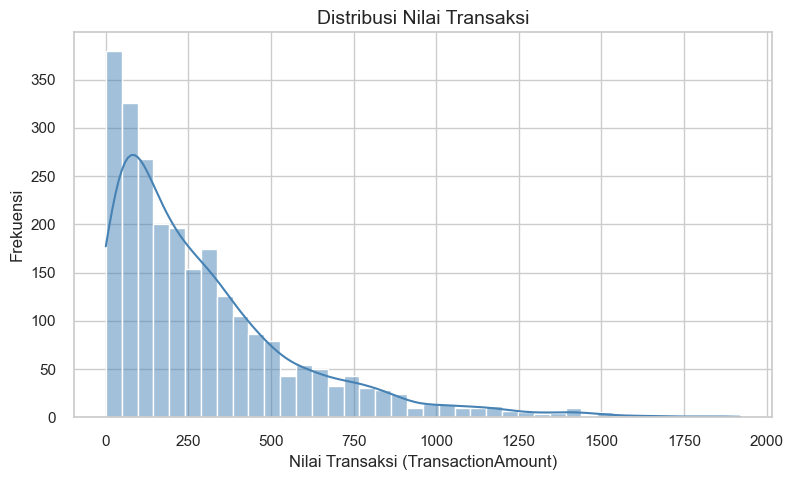

C:\Users\barak\AppData\Local\Temp\ipykernel_17848\710324315.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TransactionType', y='TransactionAmount', data=df, palette='pastel')


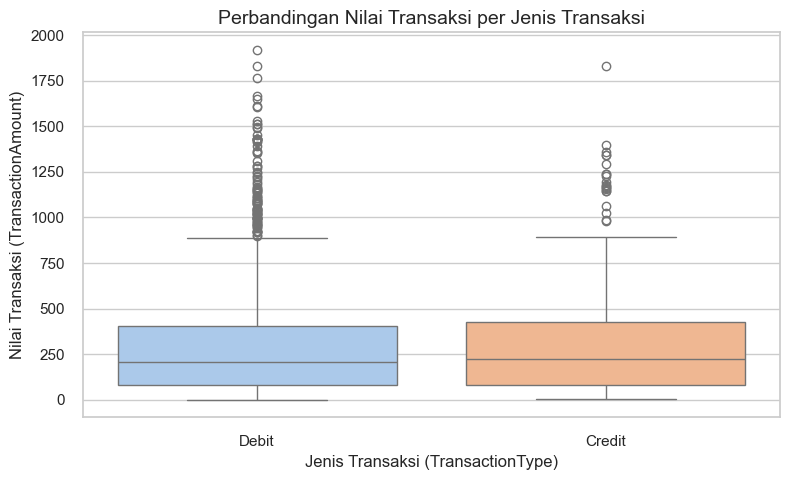

In [11]:
# Visualisasi data dengan minimal 2 grafik (misal: histogram, boxplot, scatter plot, dll)
sns.set(style="whitegrid")

plt.figure(figsize=(9, 5))
sns.histplot(df['TransactionAmount'], bins=40, kde=True, color='steelblue')
plt.title('Distribusi Nilai Transaksi', fontsize=14)
plt.xlabel('Nilai Transaksi (TransactionAmount)')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(9, 5))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df, palette='pastel')
plt.title('Perbandingan Nilai Transaksi per Jenis Transaksi', fontsize=14)
plt.xlabel('Jenis Transaksi (TransactionType)')
plt.ylabel('Nilai Transaksi (TransactionAmount)')
plt.show()

#Exploratory Data Analysis untuk Histogram - 
Berdasarkan hasil histogram TransactionAmount, distribusi transaksi terlihat condong ke kanan (right-skewed). Frekuensi transaksi tertinggi berada di kisaran 0–230, menunjukkan bahwa mayoritas nasabah melakukan transaksi dengan nominal relatif kecil.

Setelah kisaran tersebut, frekuensi transaksi menurun secara bertahap, mengindikasikan bahwa transaksi bernilai besar terjadi lebih jarang, tetapi tetap ada dalam jumlah kecil di ekor distribusi.

Pola ini mencerminkan perilaku transaksi yang normal pada data finansial, di mana transaksi kecil lebih umum daripada transaksi besar. Namun, transaksi bernilai tinggi di sisi kanan bisa menjadi kandidat awal untuk analisis anomali.

#Exploratory Data Analysis untuk Boxplot - 
Median dari kedua box kurang lebih sama, berada di nilai 250. Batas atas sekitar 900–1000 untuk Debit, sedikit lebih tinggi pada Credit. Banyak outlier dengan nilai di atas 1900.

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [13]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [14]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [16]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
from sklearn.preprocessing import StandardScaler

numerical_features = [
    'TransactionAmount', 'TransactionDuration', 
    'LoginAttempts', 'AccountBalance'
]

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

df_scaled.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [18]:
df_scaled[numerical_features].describe()

,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance
count,2.511000e+03,2.511000e+03,2.516000e+03,2.510000e+03
mean,1.542197e-16,-5.659440e-17,-1.496771e-16,1.624199e-16
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,-1.017881e+00,-1.561745e+00,-2.046294e-01,-1.286100e+00
25%,-7.404760e-01,-8.052993e-01,-2.046294e-01,-9.259754e-01
50%,-2.953617e-01,-1.059443e-01,-2.046294e-01,-9.733352e-02
75%,3.951387e-01,5.934107e-01,-2.046294e-01,6.566894e-01
max,5.549651e+00,2.577295e+00,6.525404e+00,2.531190e+00


In [49]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df_scaled
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address'])

In [50]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Periksa hasil dengan function head()
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_features = ['TransactionType', 'Location', 'MerchantID', 'Channel', 'CustomerOccupation']

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,1,36,14,0,70.0,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,1,15,51,0,68.0,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,1,23,8,2,19.0,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,1,33,1,2,26.0,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,0,1,90,2,NaN,3,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [51]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'MerchantID',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data

In [52]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()

In [53]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

In [54]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,1,36,14,0,70.0,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,1,15,51,0,68.0,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,1,23,8,2,19.0,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,1,33,1,2,26.0,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
5,-0.703375,2023-04-03 17:15:01,1,28,53,0,18.0,3,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36


# **4. Membangun Model Clustering**
Pada tahap ini, kalian membangun model clustering dengan K-Means clustering dengan kriteria tahapan berikut.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Menghitung dan menampilkan nilai Silhouette score.
4. Membuat visualisasi hasil clustering.


In [55]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000
mean,-0.003562,0.788756,21.424617,49.051533,1.011073,44.689523,1.528535,0.003191,-0.001123,-0.001625
std,0.999940,0.437496,12.432136,29.334464,0.829195,17.838057,1.154655,1.006276,0.990648,1.002409
min,-1.017881,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-1.561745,-0.204629,-1.286100
25%,-0.740408,1.000000,11.000000,24.000000,0.000000,27.000000,0.000000,-0.805299,-0.204629,-0.928979
50%,-0.296115,1.000000,21.000000,49.000000,1.000000,45.000000,2.000000,-0.105944,-0.204629,-0.104527
75%,0.388259,1.000000,32.000000,73.000000,2.000000,59.000000,3.000000,0.607683,-0.204629,0.662810
max,5.549651,2.000000,43.000000,100.000000,3.000000,80.000000,4.000000,2.577295,6.525404,2.531190


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2348 entries, 0 to 2535
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2348 non-null   float64
 1   TransactionDate          2348 non-null   object 
 2   TransactionType          2348 non-null   int64  
 3   Location                 2348 non-null   int64  
 4   MerchantID               2348 non-null   int64  
 5   Channel                  2348 non-null   int64  
 6   CustomerAge              2348 non-null   float64
 7   CustomerOccupation       2348 non-null   int64  
 8   TransactionDuration      2348 non-null   float64
 9   LoginAttempts            2348 non-null   float64
 10  AccountBalance           2348 non-null   float64
 11  PreviousTransactionDate  2348 non-null   object 
dtypes: float64(5), int64(5), object(2)
memory usage: 238.5+ KB


In [57]:
df = df.drop(columns=['TransactionDate', 'PreviousTransactionDate'])

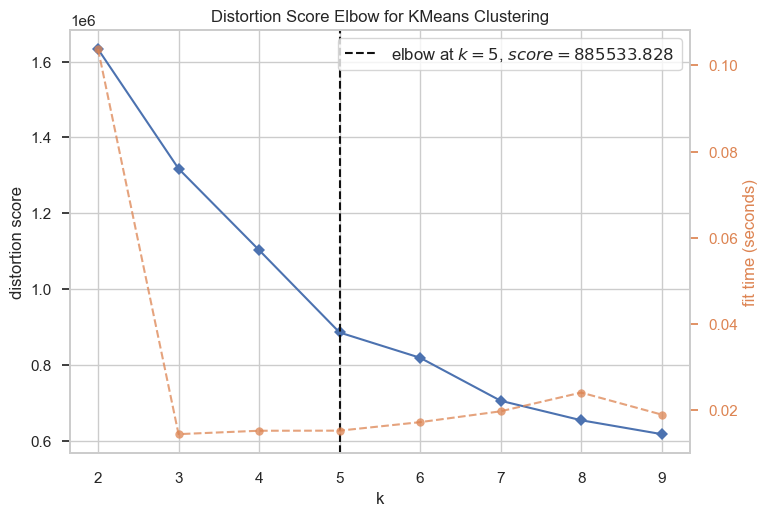

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans
model = KMeans(random_state=42)

# Visualisasi Elbow Method
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()

In [59]:
# Menggunakan algoritma K-Means Clustering
from sklearn.cluster import KMeans

# Gunakan jumlah cluster optimal dari Elbow Method (misalnya 3)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [60]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score

score = silhouette_score(df.drop(columns='Cluster'), df['Cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.2699


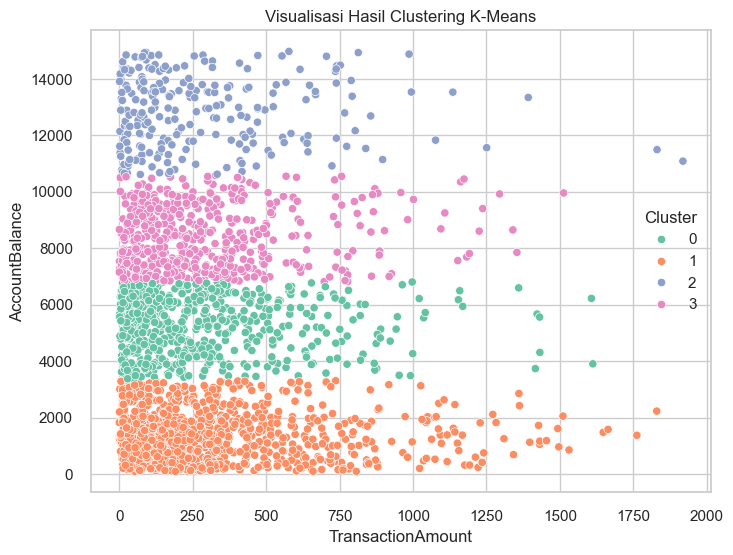

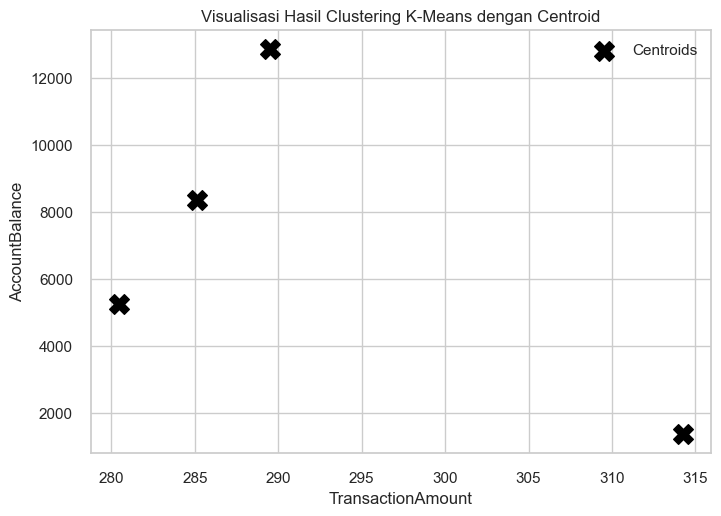

In [47]:
# Membuat visualisasi hasil clustering
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='TransactionAmount', 
    y='AccountBalance',
    hue='Cluster',
    palette='Set2'
)
plt.title('Visualisasi Hasil Clustering K-Means')
plt.show()

centroids = kmeans.cluster_centers_

plt.scatter(
    centroids[:, df.columns.get_loc('TransactionAmount')],
    centroids[:, df.columns.get_loc('AccountBalance')],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('Visualisasi Hasil Clustering K-Means dengan Centroid')
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.legend()
plt.grid(True)
plt.show()

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [43]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
result = df.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'min', 'max', 'median', 'std'],
    'CustomerAge': ['mean', 'min', 'max', 'median', 'std'],
    'AccountBalance': ['mean', 'min', 'max', 'median', 'std'],
})

In [44]:
result.index = ['Cluster ' + str(i) for i in result.index]
display(result)

TransactionAmount                                     CustomerAge  \
                       mean   min      max   median         std        mean   
Cluster 0        281.780832  1.82  1612.37  203.990  274.586733   53.118846   
Cluster 1        314.250883  0.26  1830.00  222.390  311.856973   36.173604   
Cluster 2        289.504449  1.14  1919.11  174.880  305.129104   50.656780   
Cluster 3        283.688810  0.32  1512.99  210.095  265.582713   48.434944   

                                        AccountBalance                      \
            min   max median        std           mean       min       max   
Cluster 0  18.0  80.0   54.0  16.152425    5265.633548   3319.76   6810.94   
Cluster 1  18.0  80.0   27.0  17.680524    1375.200964    101.25   3313.07   
Cluster 2  29.0  70.0   51.0  12.504161   12852.872500  10619.35  14977.99   
Cluster 3  18.0  80.0   49.0  14.937500    8368.358941   6820.23  10585.48   

                                   
              median          std  
Cluster 0   5399.760   985.096181  
Cluster 1   1268.670   826.610955  
Cluster 2  12900.670  1252.937817  
Cluster 3   8253.585  1050.296232

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: Nasabah Senior dengan Saldo Sedang**:
  - **Rata-rata (mean) CustomerAge:** 53 tahun
  - **Rata-rata (mean) AccountBalance:** 5265.633548
  - **Rata-rata (mean) TransactionAmount:** 281.780832
  - **Analisis:** Kemungkinan besar merupakan nasabah mapan dengan aktivitas transaksi moderat dan saldo yang cukup stabil.

2. **Cluster 2: Nasabah Muda dengan Saldo Rendah**:
  - **Rata-rata (mean) CustomerAge:** 36 tahun
  - **Rata-rata (mean) AccountBalance:** 1375.200964
  - **Rata-rata (mean) TransactionAmount:** 314.250883
  - **Analisis:** Cenderung nasabah baru atau berpendapatan rendah, namun cukup aktif bertransaksi.

3. **Cluster 3: Nasabah Paruh Baya dengan Saldo Tinggi**:
  - **Rata-rata (mean) CustomerAge:** 50 tahun.
  - **Rata-rata (mean) AccountBalance:** 12852.872500	
  - **Rata-rata (mean) TransactionAmount:** 289.504449
  - **Analisis:** Cenderung merupakan nasabah premium atau eksekutif yang memiliki saldo besar dan aktivitas transaksi stabil.

4. **Cluster 4: Nasabah Menengah dengan Saldo Cukup Tinggi**:
  - **Rata-rata (mean) CustomerAge:** 48 tahun.
  - **Rata-rata (mean) AccountBalance:** 8368.358941
  - **Rata-rata (mean) TransactionAmount:** 283.688810
  - **Analisis:** Bisa jadi merupakan nasabah menengah ke atas dengan perilaku finansial stabil.